<a href="https://colab.research.google.com/github/Baasty-OCh/Miner-a-curso-/blob/Labs/P1PM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hito 1
Integrantes:
Bastián Olguín - Benjamín Indo - Javiera Valenzuela - Vicente Muñoz

# **1. Introducción (problema y motivación)**
**Contexto general del problema y el conjunto de datos**

Este conjunto de datos, titulado "Student Performance & Behavior Dataset", contiene información real de 5,000 estudiantes recopilada por un proveedor privado de educación. Incluye atributos clave relacionados con el rendimiento académico y el comportamiento de los estudiantes, como asistencia, calificaciones en exámenes, participación en actividades extracurriculares, nivel educativo de los padres, nivel de estrés, entre otros.

**¿Por qué es interesante analizar estos datos?**

Analizar este conjunto de datos es valioso porque permite explorar cómo diversos factores personales, académicos y socioeconómicos influyen en el rendimiento estudiantil. Esto puede ayudar a identificar patrones y relaciones que informen estrategias educativas, intervenciones personalizadas y políticas para mejorar los resultados académicos y el bienestar de los estudiantes.


# **2. Exploración de datos (estadísticas, patrones iniciales)**

In [ ]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
# Download latest version
path = kagglehub.dataset_download(r"mahmoudelhemaly/students-grading-dataset")
# Guardamos la ruta
csv = os.path.join(path, 'Students_Grading_Dataset_Biased.csv')
# Cargamos el csv con pd
df = pd.read_csv(csv)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

Tipos de datos que contiene el dataset:

*   Demográficos: Student_ID, First_Name, Last_Name, Email, Gender, Age, Department.
*   Académicos: Attendance (%), Midterm_Score, Final_Score, Assignments_Avg, Quizzes_Avg, Participation_Score, Projects_Score, Total_Score, Grade.
*   Hábitos y comportamiento: Study_Hours_per_Week, Extracurricular_Activities, Internet_Access_at_Home, Parent_Education_Level, Family_Income_Level, Stress_Level, Sleep_Hours_per_Night.



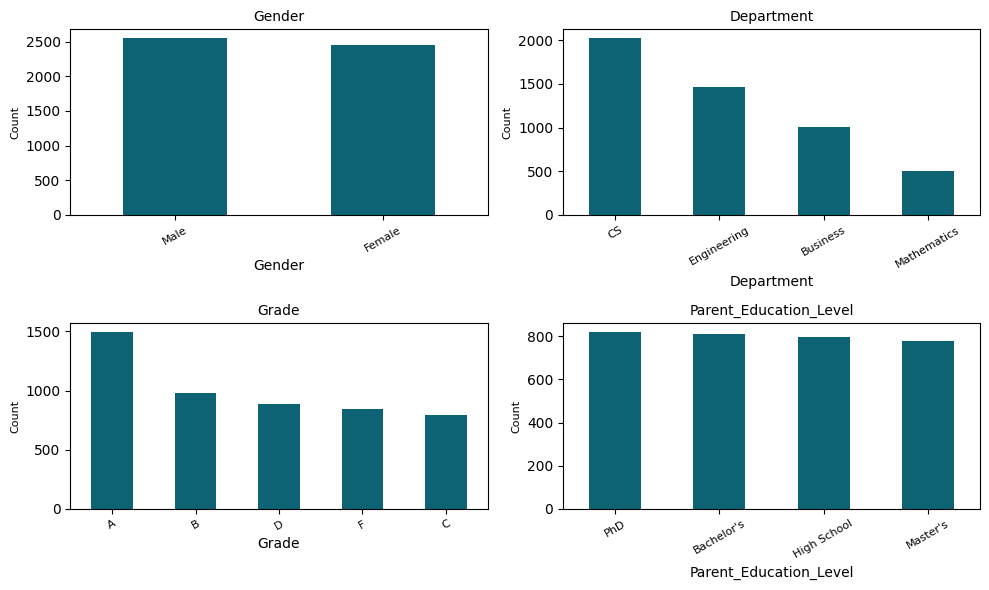

In [ ]:
import matplotlib.pyplot as plt
categories = ['Gender', 'Department', 'Grade', 'Parent_Education_Level']
n_cols = 2
n_rows = (len(categories) + 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 6))
axes = axes.flatten()
for i, col in enumerate(categories):
    df[col].value_counts().plot(kind='bar', ax=axes[i], color='#0d6374')
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=30, fontsize=8)
    axes[i].set_ylabel('Count', fontsize=8)
for j in range(len(categories), n_rows * n_cols):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [ ]:
# Algunos datos importantes del dataset
shape = df.shape
print(f"El dataset tiene {shape[0]} filas y {shape[1]} columnas")

El dataset tiene 5000 filas y 23 columnas


In [ ]:
df.describe()

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night
count,5000.000000,4484.000000,5000.000000,5000.000000,4483.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,21.048400,75.431409,70.326844,69.640788,74.798673,74.910728,4.980024,74.924860,75.121804,17.658860,5.48080,6.488140
std,1.989786,14.372446,17.213209,17.238744,14.411799,14.504281,2.890136,14.423415,14.399941,7.275864,2.86155,1.452283
min,18.000000,50.010000,40.000000,40.000000,50.000000,50.030000,0.000000,50.010000,50.020000,5.000000,1.00000,4.000000
25%,19.000000,63.265000,55.457500,54.667500,62.090000,62.490000,2.440000,62.320000,62.835000,11.400000,3.00000,5.200000
50%,21.000000,75.725000,70.510000,69.735000,74.810000,74.695000,4.955000,74.980000,75.395000,17.500000,5.00000,6.500000
75%,23.000000,87.472500,84.970000,84.500000,86.970000,87.630000,7.500000,87.367500,87.652500,24.100000,8.00000,7.700000
max,24.000000,100.000000,99.980000,99.980000,99.980000,99.960000,10.000000,100.000000,99.990000,30.000000,10.00000,9.000000


In [ ]:
nulls = df.isnull().sum()
nulls[nulls > 0].sort_values(ascending=False)

,0
Parent_Education_Level,1794
Assignments_Avg,517
Attendance (%),516


# **3. Preguntas y problemas (formulación de preguntas y posibles hipótesis)**

## Preguntas tentativas
1. ¿Se puede predecir la nota final de los alumnos en base a la asistencia, nota de tareas, nota de quizzes, nota de participación, horas de estudio por semana y horas de sueño por noche?**[Aprendizaje supervisado (regresión)]**

  Esta pregunta es clave para entender cómo los hábitos académicos y de vida cotidiana impactan directamente en el rendimiento de los estudiantes. Identificar relaciones claras entre estas variables y la nota final permitiría optimizar métodos de estudio y mejorar el rendimiento general con recomendaciones prácticas.
2. ¿Es posible predecir la calificación final (Grade) de un estudiante en función de sus hábitos de estudio, asistencia, participación en actividades extracurriculares y factores socioeconómicos? **[Aprendizaje supervisado (clasificación)]**

  Analizar esta relación permite comprender el efecto combinado de elementos académicos y del entorno personal en el desempeño de los estudiantes.
  Esta información puede ser muy útil para diseñar políticas de apoyo más efectivas, especialmente para alumnos en condiciones desfavorables.

  Esta pregunta es parecida a la anterior pero aquí lo que se busca predecir es la calificación final, que es una es categórica marcada en letras (A-B-C-D-E-F)
3.¿Existen grupos de estudiantes con comportamientos y rendimientos académicos similares? **[Aprendizaje No supervisado (clustering)]**

  Identificar grupos con patrones comunes en su rendimiento y comportamiento ayuda a personalizar estrategias educativas, crear programas específicos para distintos perfiles estudiantiles y mejorar la gestión del aprendizaje a nivel institucional.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

FEATURES_Q1 = ["Attendance (%)", "Assignments_Avg", "Quizzes_Avg",
               "Participation_Score", "Study_Hours_per_Week",
               "Sleep_Hours_per_Night"]
TARGET_Q1 = 'Final_Score'

df_reg = df.copy()
df_reg[FEATURES_Q1] = df_reg[FEATURES_Q1].fillna(df_reg[FEATURES_Q1].mean())
X = df_reg[FEATURES_Q1]
y = df_reg[TARGET_Q1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = {
    'SVR (RBF)': SVR(kernel='rbf', C=1.0, epsilon=0.1),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'KNeighbors': KNeighborsRegressor(n_neighbors=5)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - RMSE: {rmse:.2f}, R²: {r2:.2f}')


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

FEATURES = {
    "Attendance (%)": "Attendance (%)",
    "Assignments_Avg": "Assignments_Avg",
    "Quizzes_Avg": "Quizzes_Avg",
    "Participation_Score": "Participation_Score",
    "Study_Hours_per_Week": "Study_Hours_per_Week",
    "Sleep_Hours_per_Night": "Sleep_Hours_per_Night",
}
TARGET = "Grade"

# Prepare data for the second question (classification)
# Features and target from the previous definition
X = df[[FEATURES[col] for col in FEATURES]]
y = df[TARGET]

# Encode the target variable 'Grade' as it is categorical
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Decode the predicted labels back to original grades for the report
y_test_decoded = le.inverse_transform(y_test)
y_pred_decoded = le.inverse_transform(y_pred)

print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))


Accuracy: 0.35

Classification Report:
              precision    recall  f1-score   support

           A       0.58      0.65      0.61       298
           B       0.18      0.14      0.16       180
           C       0.20      0.18      0.19       161
           D       0.29      0.35      0.31       176
           F       0.24      0.21      0.22       185

    accuracy                           0.35      1000
   macro avg       0.30      0.31      0.30      1000
weighted avg       0.33      0.35      0.34      1000



# **4. Propuesta experimental (estrategia metodológica)**

## Estrategia Metodológica
### ANTES DE TODO: Preprocesamiento de Datos
Antes de aplicar cualquier modelo, es esencial realizar un proceso de **limpieza de datos**. Esto incluye la gestión de valores faltantes y la trasnformación adecuada de variables según sea necesario. Además, es importante **escalar los datos** para evitar problemas de rendimiento en los modelos.

###1. Predicción de Notas Finales
Para predecir las **notas finales** de los estudiantes, utilizando factores como la asistencia, nota de tareas, nota de quizzes, nota de participación, horas de estudio por semana y horas de sueño por noche, se utilizarán modelos de **aprendizaje supervisado**. Los modelos seleccionados son:

- **Regresión Lineal**: Para modelar la relación lineal entre las variables independientes y la nota final.
- **Random Forest**: Para capturar las relaciones no lineales.

La evaluación de estos modelos se realizará mediante las siguientes métricas:

- **RMSE**: Para medir la diferencia entre los valores predichos y los reales.
- **R²**: Para evaluar el porcentaje de variabilidad explicada por el modelo.

###2. Predicción de Calificación Final
Para predecir la **calificación final** (A-B-C-D-E-F), se utilizarán modelos de clasificación ya que la variable objetivo es categórica. Los modelos a utilizar serán los siguientes:
-**Árboles de decisión**: Para ver qué reglas siguen los atributos que determinan la calificación
- **Random Forest**
- **Support Vector Machine (SVM)**
Las métricas de evaluación para estos modelos serán:
- **Acuracy**: Para medir el porcentaje de predicciones correctas.
- **Precision**: Para evaluar la precisión de la clasificación.
- **Recall**: Para medir el porcentaje de casos positivos detectados.

###3. Identificación de Grupos de Estudiantes
Para encontrar **grupos de estudiantes** con comportamientos y rendimientos académicos similares, se utilizaran técnicas de **aprendizaje no supervisado** (clustering) :
- **K-means**: Algoritmo de clustering que agrupa a los estudiantes en k-grupos basados en la similitud de sus características
- **DBSCAN**: Algoritmo basado en densidad que identifica clusters de estudiantes en áreas donde hay mayor concentración de datos.
